# Lab 4.02


Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions
Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from IPython.display import display

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data.columns = list(map(lambda x: x.lower().replace(' ','_'), data.columns))

In [4]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Find all of the categorical data. Save it in a categorical_df variable.

In [5]:
categorical_df = data.select_dtypes(include =[object])
categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Check for NaN values.

In [6]:
categorical_df.isna().sum()

state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

Check all unique values of columns.

In [7]:
categorical_df.apply(pd.Series.unique)

state                [Washington, Arizona, Nevada, California, Oregon]
response                                                     [No, Yes]
coverage                                    [Basic, Extended, Premium]
education            [Bachelor, College, Master, High School or Bel...
effective_to_date    [2/24/11, 1/31/11, 2/19/11, 1/20/11, 2/3/11, 1...
employmentstatus     [Employed, Unemployed, Medical Leave, Disabled...
gender                                                          [F, M]
location_code                                 [Suburban, Rural, Urban]
marital_status                             [Married, Single, Divorced]
policy_type              [Corporate Auto, Personal Auto, Special Auto]
policy               [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                      [Offer1, Offer3, Offer2, Offer4]
sales_channel                        [Agent, Call Center, Web, Branch]
vehicle_class        [Two-Door Car, Four-Door Car, SUV, Luxury SUV,...
vehicl

In [8]:
display(categorical_df['state'].value_counts(dropna=False))
display(categorical_df['employmentstatus'].value_counts(dropna=False))
display(categorical_df['vehicle_class'].value_counts(dropna=False))
display(categorical_df['vehicle_size'].value_counts(dropna=False)) 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

Check dtypes. Do they all make sense as categorical data?

In [9]:
categorical_df.dtypes

state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [10]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'], errors='coerce')

In [11]:
categorical_df.dtypes

state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employmentstatus             object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

Does any column contain alpha and numeric data? Decide how to clean it.
#Renew Offer Type could be just  numeric in this case.	

In [12]:
display(categorical_df['sales_channel'].value_counts(dropna=False)) #Could simply be considered as so for encoding later.

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [13]:
display(categorical_df['renew_offer_type'].value_counts(dropna=False)) #Could simply be shown as numbers

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [14]:
def cleanoperation(x):
    
    if  (x == "Offer1"):
        return "1"
    elif (x == "Offer2"):
        return "2"
    elif (x == "Offer3"):
        return "3"
    else:
        return '4'

In [15]:
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(cleanoperation)

In [16]:
categorical_df['renew_offer_type']

0       1
1       3
2       1
3       1
4       1
       ..
9129    2
9130    1
9131    1
9132    3
9133    4
Name: renew_offer_type, Length: 9134, dtype: object

Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [17]:
display(categorical_df['employmentstatus'].value_counts(dropna=False))

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [18]:
def cleanOperation(x):
    
    if  (x == "Medical Leave"):
        return "Employed"
    elif (x == "Disabled"):
        return "Unemployed"
    else:
        return "Retired"

# Those who are retired are probably no longer working, although they may choose to do so, but earn a retirement.  
# Disability shouldn't, of course, be a synonym of unemployment, but this answer instead of "Employed" may be an indication.
# Those in Medical Leave are, indeed, employed, or wouldn't fit this label.

In [19]:
#categorical_df['employmentstatus'] = categorical_df['employmentstatus'].apply(cleanOperation)
categorical_df['employmentstatus'] = list(map(cleanOperation, categorical_df['employmentstatus']))

In [20]:
display(categorical_df['education'].value_counts(dropna=False))

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [21]:
categorical_df['education'] = np.where(categorical_df['education'].isin(['Master','Doctor']) , 'Postgraduate', categorical_df['education'])
categorical_df['education'] = np.where(categorical_df['education'].isin(['College','Bachelor']) , 'Undergraduate', categorical_df['education'])

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [22]:
categorical_df.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Undergraduate,2011-02-24,Retired,F,Suburban,Married,Corporate Auto,Corporate L3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Undergraduate,2011-01-31,Retired,F,Suburban,Single,Personal Auto,Personal L3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Undergraduate,2011-02-19,Retired,F,Suburban,Married,Personal Auto,Personal L3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Undergraduate,2011-01-20,Retired,M,Suburban,Married,Corporate Auto,Corporate L2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Undergraduate,2011-02-03,Retired,M,Rural,Single,Personal Auto,Personal L1,1,Agent,Four-Door Car,Medsize


In [23]:
display(categorical_df['policy'].value_counts(dropna=False)) 
display(categorical_df['policy_type'].value_counts(dropna=False))
# Just a name for policy_type. L1, L2 and L3 for each category sum up to the different categories in policy_type. 
#Can be dropped, for policy doesn't add any new info, it's best to have it categorized in three types.
#categorical_df = categorical_df.drop(['policy'], axis=1)
#For now, I'll be just leaving policy with numbers and policy_type with the type.

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [24]:
def cleanOperation2(x):
    
    if  (x == 'Personal L3') | (x == 'Corporate L3') | (x == 'Special L3'):
        return "3"
    elif (x == 'Personal L2') | (x == 'Corporate L2') | (x == 'Special L2'):
        return "2"
    else:
        return "1"

In [25]:
categorical_df['policy'] = categorical_df['policy'].apply(cleanOperation2)

In [26]:
categorical_df['policy']

0       3
1       3
2       3
3       2
4       1
       ..
9129    1
9130    3
9131    2
9132    2
9133    3
Name: policy, Length: 9134, dtype: object

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [27]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Luxury SUV', 'Luxury Car']) , 'Luxury', categorical_df['vehicle_class'])
#Luxury SUV and Luxury Cars are both luxury cars.
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Sports Car']) , 'SUV', categorical_df['vehicle_class'])
#SUVs are also Sports Cars, although they may differ in size.

In [28]:
display(categorical_df['vehicle_class'].value_counts(dropna=False))

Four-Door Car    4621
SUV              2280
Two-Door Car     1886
Luxury            347
Name: vehicle_class, dtype: int64

In [29]:
categorical_df.nunique()

state                 5
response              2
coverage              3
education             3
effective_to_date    59
employmentstatus      3
gender                2
location_code         3
marital_status        3
policy_type           3
policy                3
renew_offer_type      4
sales_channel         4
vehicle_class         4
vehicle_size          3
dtype: int64

# Lab 4.03 

Instructions
Open the categoricals variable we created before.

In [30]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

C:\Users\franc\AppData\Local\Temp/ipykernel_9948/1940378060.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Plot all the categorical variables with the proper plot. What can you see?

for column in categorical_df.columns:
    sns.barplot(x=column, y=data['total_claim_amount'], data=categorical_df)
    plt.show()

for column in categoricals.columns:
    sns.barplot(x=column, y=data['total_claim_amount'], data=categoricals)
    plt.show()

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
#For the original data, policy and policy type look redundant.

In [31]:
data_crosstab = pd.crosstab(categorical_df['vehicle_size'], categorical_df['vehicle_class'], margins = False)
data_crosstab

vehicle_class,Four-Door Car,Luxury,SUV,Two-Door Car
vehicle_size,,,,
Large,475,34,216,221
Medsize,3237,231,1674,1282
Small,909,82,390,383


In [32]:
import scipy.stats as st
print('p-value:', st.chi2_contingency(data_crosstab)[1])

p-value: 0.0018858517841835653


In [33]:
#There is evidence that vehicle_class and vehicle_size are not independent variables.

In [34]:
data_crosstab = pd.crosstab(categoricals['policy'], categoricals['policy_type'], margins = False)
data_crosstab

policy_type,Corporate Auto,Personal Auto,Special Auto
policy,,,
Corporate L1,359,0,0
Corporate L2,595,0,0
Corporate L3,1014,0,0
Personal L1,0,1240,0
Personal L2,0,2122,0
Personal L3,0,3426,0
Special L1,0,0,66
Special L2,0,0,164
Special L3,0,0,148


In [35]:
print('p-value:', st.chi2_contingency(data_crosstab)[1]) # We already saw that these two variables were linked before and the redundancy holds.

p-value: 0.0


Plot time variable. Can you extract something from it?

In [36]:
#categoricals['effective_to_date'] = pd.to_datetime(categoricals['effective_to_date'], ).dt.month
categorical_df['effective_to_date'] = categorical_df['effective_to_date'].apply(lambda x: pd.Timestamp(x).strftime('%d%m%Y')).astype('int64')

sns.barplot(x='effective_to_date', y=data['total_claim_amount'], data=categoricals)
plt.show()

In [37]:
#Only 2 months are contemplated in the data and their difference is quite small. It doesn't tell us much.
#display(categorical_df['effective_to_date'].dt.month.value_counts())

# Lab 4.01

#### An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

#### Retain customers,
#### Analyze relevant customer data,
#### Develop focused customer retention programs.
#### Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Import the necessary libraries.

In [38]:
import pandas as pd
import statistics as stats
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder  
from sklearn.model_selection import train_test_split

### Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [39]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### First look at its main features (head, shape, info).



In [40]:
customer_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268,OC83172,XZ87318,CF85061,DY87989,BQ94931,SX51350,VQ65197,DP39365,SJ95423,IL66569,BW63560,FV94802,OE15005,WC83389,FL50705
State,Washington,Arizona,Nevada,California,Washington,Oregon,Oregon,Arizona,Oregon,Oregon,California,California,California,Arizona,California,Oregon,Nevada,California,Oregon,California
Customer Lifetime Value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575,8256.2978,5380.898636,7216.100311,24127.50402,7388.178085,4738.992022,8197.197078,8798.797003,8819.018934,5384.431665,7463.139377,2566.867823,3945.241604,5710.333115,8162.617053
Response,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic,Basic,Basic,Premium,Basic,Extended,Basic,Basic,Premium,Basic,Basic,Basic,Basic,Basic,Basic,Premium
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor,College,Master,Bachelor,College,College,College,Master,High School or Below,College,Bachelor,High School or Below,College,College,High School or Below
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11,1/25/11,2/24/11,1/18/11,1/26/11,2/17/11,2/21/11,1/6/11,2/6/11,1/10/11,1/18/11,1/17/11,2/6/11,1/5/11,2/27/11,1/14/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed,Employed,Employed,Unemployed,Medical Leave,Employed,Unemployed,Unemployed,Employed,Employed,Employed,Employed,Medical Leave,Medical Leave,Employed,Employed
Gender,F,F,F,M,M,F,F,M,M,F,M,F,M,M,M,F,M,M,M,F
Income,56274,0,48767,0,43836,62902,55350,0,14072,28812,0,0,77026,99845,83689,24599,25049,28855,51148,66140


In [41]:
customer_df.shape

(9134, 24)

In [42]:
customer_df.isna().sum() #No Nans

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)



In [43]:
customer_df.columns = list(map(lambda x: x.lower().replace(' ','_'), customer_df.columns))

### Change effective to date column to datetime format.

In [44]:
#customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [45]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [46]:
customer_df_num = customer_df.select_dtypes(include=[np.number])

### Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [47]:
def discrete(x):
    
    column = list(x.columns)
    continuous = []
    
    for i in column:
        if x[i].nunique() > 100:
            continuous.append(i)
        else:
            pass
        
    discrete_df = x.drop(continuous, axis =1 )
    return discrete_df

def continuous(x):            
 
    column = list(x.columns)
    discrete = []
    
    for i in column:
        if x[i].nunique() <= 100:
            discrete.append(i)
        else:
            pass
        
    continuous_df = x.drop(discrete, axis =1 )
    return continuous_df

In [48]:
continuous_df = continuous(customer_df_num)

In [49]:
discrete_df = discrete(customer_df_num)

In [50]:
discrete_df.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [51]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


### Plot a correlation matrix, comment what you see.



In [52]:
correlations_matrix = customer_df.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


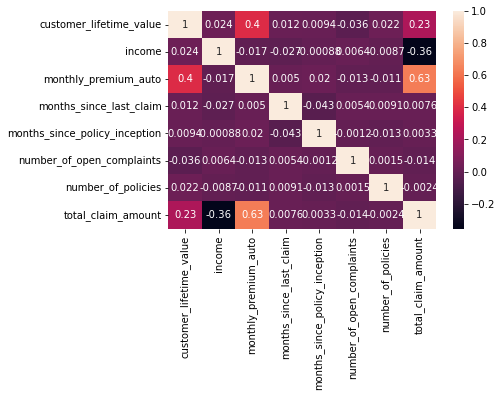

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)



def plot_discrete(table):
    for column in table.columns:
        sns.barplot(x = column, y = customer_df['total_claim_amount'], data=table)
        plt.show() 

plot_discrete(discrete_df)

def plot_continuous(table):
    
    for column in table.columns:
        table[column].hist(bins=5, legend=True)
        plt.show()

plot_continuous(continuous_df)

### Comment what you can see in the plots.

### Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


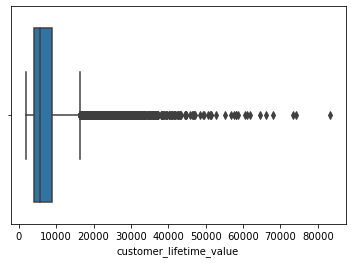

C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


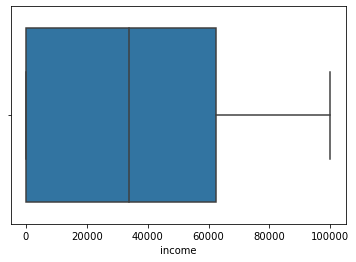

C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


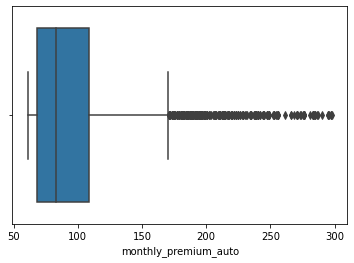

C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


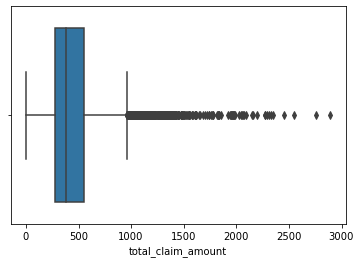

In [54]:
for column in continuous_df.columns:
    sns.boxplot(continuous_df[column])
    plt.show()

### Did you find outliers? Comment what you will do with them.

In [55]:
#Dealing with outliers.
#1. total_claim_amount is the target, so outliers shouldn't be removed; 
#2. income does not have outliers; 
#3. customer_life_value and monthly_premium_auto have a highest number of outliers, 
# but since those variables have some kind of correlation to the target and between themselves, we should better take a look at how the scalers deal with them first. 

### Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [56]:
customer_df.isnull().sum()/len(customer_df) #No Nans

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# Lab 4.05

In [57]:
display(categorical_df.head()) # cleaned categorical data
display(customer_df_num.head()) # numerical data

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Undergraduate,24022011,Retired,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Undergraduate,31012011,Retired,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Undergraduate,19022011,Retired,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Undergraduate,20012011,Retired,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Undergraduate,3022011,Retired,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Import sklearn train_test_split and separate the data.

In [58]:
data = pd.concat([categorical_df, customer_df_num], axis=1)
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [101]:
X_train_num = X_train.select_dtypes(include = np.number).copy()
X_train_cat = X_train.select_dtypes(include = object).copy()

(6850, 8)

We will start with removing outliers, if you have not already done so. We have discussed different methods to 
remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe. Create a copy of the dataframe for the data wrangling.

-- I chose not to remove outliers from continuous variables in the previous lab, but here's the function to compare results later.

--First, create a copy of the dataframe and get continuous data from X_train:

X_train_continuous_df = continuous(X_train_num)

def remove_outliers(x):
    for column in x.columns:
        iqr = np.percentile(x[column],75) - np.percentile(x[column],25)
        upper_limit = np.percentile(x[column],75) + 1.5*iqr
        lower_limit = np.percentile(x[column],25) - 1.5*iqr
        x = x[(x[column]>lower_limit) & (x[column]<upper_limit)]
    return x
    
remove_outliers(X_train_continuous_df)

Normalize the continuous variables. You can use any one method you want.

#Split X_train between continuous and discrete

X_train_continuous = continuous(X_train_num)
X_train_discrete = discrete(X_train_num)

def log_transfom_clean(x): 
    x = np.log10(x) 
    if np.isfinite(x): 
        return x 
    else: 
        return np.NAN

In [102]:
transformer = StandardScaler().fit(X_train_num)
x_standardized = transformer.transform(X_train_num)
x_standardized = pd.DataFrame(x_standardized, columns= X_train_num.columns)

(6850, 8)

Encode the categorical variables (See the hint below for encoding categorical data!!!) You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

Encoder Type	Column
One hot	state
Ordinal	coverage
Ordinal	employmentstatus
Ordinal	location code
One hot	marital status
One hot	policy type
One hot	policy
One hot	renew offercustomer_df
One hot	sales channel
One hot	vehicle class
Ordinal	vehicle size
Dummy code
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.

In [62]:
X_train_onehot = X_train_cat.drop(['vehicle_size','location_code', 'employmentstatus', 'coverage'], axis=1)
#could have ordinalencoded education as well.

In [63]:
encoder = OneHotEncoder(drop='first').fit(X_train_onehot)
encoded = encoder.transform(X_train_onehot).toarray()
cols = encoder.get_feature_names(input_features=X_train_onehot.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()

C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_Postgraduate,education_Undergraduate,gender_M,marital_status_Married,marital_status_Single,...,policy_3,renew_offer_type_2,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
X_train_ordinal = X_train_cat.drop(X_train_onehot, axis=1)

In [65]:
#X_train_ordinal.apply(pd.Series.unique)

In [66]:
X_train_ordinal["coverage"] = X_train_ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_train_ordinal["employmentstatus"] = X_train_ordinal["employmentstatus"].map({"Retired" : 0, "Unemployed" : 1, "Employed" : 1})
X_train_ordinal["location_code"] = X_train_ordinal["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_train_ordinal["vehicle_size"] = X_train_ordinal["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [67]:
X_train_ordinal = X_train_ordinal.reset_index()
onehot_encoded = onehot_encoded.reset_index()
x_standardized = x_standardized.reset_index()
#X_train_continuous = X_train_continuous.reset_index()
#X_train_discrete = X_train_discrete.reset_index()

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful. #Done in lab 4.02

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [104]:
display(X_train_ordinal.shape)
display(onehot_encoded.shape)
display(x_standardized.shape)
#display(X_train_continuous.head())
#display(X_train_discrete.head())

(6850, 5)

(6850, 24)

(6850, 8)

In [105]:
X_train_over = pd.concat([X_train_ordinal,onehot_encoded,x_standardized],axis=1)

In [106]:
X_train_over.shape


(6850, 37)

In [107]:
X_train_over.isna().sum()

index                            0
coverage                         0
employmentstatus                 0
location_code                    0
vehicle_size                     0
index                            0
state_California                 0
state_Nevada                     0
state_Oregon                     0
state_Washington                 0
response_Yes                     0
education_Postgraduate           0
education_Undergraduate          0
gender_M                         0
marital_status_Married           0
marital_status_Single            0
policy_type_Personal Auto        0
policy_type_Special Auto         0
policy_2                         0
policy_3                         0
renew_offer_type_2               0
renew_offer_type_3               0
renew_offer_type_4               0
sales_channel_Branch             0
sales_channel_Call Center        0
sales_channel_Web                0
vehicle_class_Luxury             0
vehicle_class_SUV                0
vehicle_class_Two-Do

Try a simple linear regression with all the data to see whether we are getting good results.

In [108]:
lm = linear_model.LinearRegression()
lm.fit(X_train_over,y_train)

LinearRegression()

In [109]:
score = lm.score(X_train_over, y_train)
score

0.6235799377536564

In [110]:
#Dealing with X_test
X_test_num = X_test.select_dtypes(include = np.number).copy()
X_test_cat = X_test.select_dtypes(include = object).copy()

#Split X_test between continuous and discrete
#X_test_continuous = continuous(X_test_num)
#X_test_discrete = discrete(X_test_num)

In [111]:
x_standardized_test = transformer.transform(X_test_num)
x_standardized_test = pd.DataFrame(x_standardized_test, columns= X_train_num.columns)
x_standardized_test.shape

(2284, 8)

Encode the categorical variables (See the hint below for encoding categorical data!!!) You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

Encoder Type	Column
One hot	state
Ordinal	coverage
Ordinal	employmentstatus
Ordinal	location code
One hot	marital status
One hot	policy type
One hot	policy
One hot	renew offercustomer_df
One hot	sales channel
One hot	vehicle class
Ordinal	vehicle size
Dummy code
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.

In [112]:
X_test_onehot = X_test_cat.drop(['vehicle_size','location_code', 'employmentstatus', 'coverage'], axis=1)

In [113]:
encoded_test = encoder.transform(X_test_onehot).toarray()
cols = encoder.get_feature_names(input_features=X_test_onehot.columns)
onehot_encoded_test = pd.DataFrame(encoded_test, columns=cols)
onehot_encoded_test.head()

C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_Postgraduate,education_Undergraduate,gender_M,marital_status_Married,marital_status_Single,...,policy_3,renew_offer_type_2,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
X_test_ordinal = X_test_cat.drop(X_test_onehot, axis=1)

In [115]:
#X_train_ordinal.apply(pd.Series.unique)

In [116]:
X_test_ordinal["coverage"] = X_test_ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_test_ordinal["employmentstatus"] = X_test_ordinal["employmentstatus"].map({"Retired" : 0, "Unemployed" : 1, "Employed" : 1})
X_test_ordinal["location_code"] = X_test_ordinal["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_test_ordinal["vehicle_size"] = X_test_ordinal["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [117]:
X_test_ordinal = X_test_ordinal.reset_index()
onehot_encoded_test = onehot_encoded_test.reset_index()
x_standardized_test.reset_index()
#X_test_continuous = X_test_continuous.reset_index()
#X_test_discrete = X_test_discrete.reset_index()

,index,effective_to_date,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,-0.161521,-0.420154,0.628708,-0.815199,-1.102339,1.441982,0.678691,1.261806
1,1,-0.625310,-0.453878,-0.535916,0.861964,-1.202123,-1.294777,-0.420631,-0.821436
2,2,0.188355,-0.365039,-0.119332,-0.728450,-0.403854,1.261932,-0.420631,2.511752
3,3,0.188355,-0.626959,-0.657119,0.081216,-0.902772,-1.546847,-0.420631,-0.821436
4,4,-1.323899,0.102248,0.501212,0.457132,-1.002555,0.433702,-0.420631,2.095103
...,...,...,...,...,...,...,...,...,...
2279,2279,-1.671450,-0.652198,-0.205087,-0.034451,0.893332,1.694052,3.976660,-0.821436
2280,2280,-1.556375,1.543611,0.935619,-0.786283,-1.102339,1.802081,-0.420631,-0.404788
2281,2281,-1.555212,-0.795100,-0.077558,-0.844116,1.092900,-0.538567,-0.420631,-0.821436
2282,2282,-0.160359,-0.790680,1.292343,-0.844116,-1.301906,0.721782,-0.420631,-0.821436


The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful. #Done in lab 4.02

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [118]:
display(X_test_ordinal.shape)
display(onehot_encoded_test.shape)
display(x_standardized_test.shape)
#display(X_test_continuous.head())
#display(X_test_discrete.head())

(2284, 5)

(2284, 24)

(2284, 8)

In [119]:
X_test_over = pd.concat([X_test_ordinal,onehot_encoded_test,x_standardized_test],axis=1)

In [120]:
X_test_over.shape

(2284, 37)

In [121]:
score = lm.score(X_test_over, y_test)
score

0.6115033235928771

Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [122]:
def models(X_train, X_test, y_train, y_test): 
    from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.linear_model import LinearRegression
    
    models_list = ['KNeighborsRegressor',LinearRegression,MLPRegressor]
    
    for model in models_list:
        if model == 'KNeighborsRegressor':
            k = int(input('Choose a k value:'))
            model = KNeighborsRegressor(n_neighbors= k)
            model.fit(X_train,y_train)
            score = model.score(X_test, y_test)
            print('The score for', model, 'is', score,)
        else:
            model = model()
            model.fit(X_train,y_train)
            score = model.score(X_test, y_test)
            print('The score for', model, 'is', score,)

Use the function to check LinearRegressor and KNeighborsRegressor.

You can check also the MLPRegressor for this task!

Check and discuss the results.

In [123]:
models(X_train_over, X_test_over, y_train, y_test)

Choose a k value:6
The score for KNeighborsRegressor(n_neighbors=6) is -0.17435534919555473
The score for LinearRegression() is 0.6115033235928771
The score for MLPRegressor() is 0.5713466298000005


C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### def models(X,y): ### Work on the function to include all steps!
    print('Which model do you want to run?')
    model = input('Press K for KNeighbors Regressor, Li for Linear Regressor and Lo for Logistic Regressor:')

    if model == 'K':
        k = input('Input a value for k:')
        KN = KNeighborsRegressor(n_neighbors= k)
        KN.fit(X, y)
        score = KN.score(X, y)
        print('The score for your train data is:', score)
        input('Now input your test data:')
        X_test = input('Input X_test:')
        y_test = input('Input your y_test:')
        score = KN.score(X_test, y_test)
        print('The score for your train data is:', score)
    elif model == 'Li':
        Li = linear_model.LinearRegression()
        Li.fit(X_train_over,y_train)
        score = Li.score(X, y)
        print('The score for your train data is:', score)
        input('Now input your test data:')
        X_test = input('Input X_test:')
        y_test = input('Input your y_test:')
        score = Li.score(X_test, y_test)
        print('The score for your train data is:', score)
    else:
        Lo = LogisticRegression(random_state=0, solver='lbfgs')
        Lo.fit(X, y)
        score = Lo.score(X, y)
        print('The score for your train data is:', score)
        input('Now input your test data:')
        X_test = input('Input X_test:')
        y_test = input('Input your y_test:') 
        score = Lo.score(X_test, y_test)
        print('The score for your train data is:', score)